In [1]:
import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from ft_finetuning import *
from common_helpers import *
from plotting_helper import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Single Modality

In [3]:
data = pd.read_pickle('/content/drive/MyDrive/annamayya_dataset_ftvectors.pkl')

In [4]:
gpu, cpu = get_devices()

In [6]:
ft_txt_only_results = run_k_fold(gpu, data, 'ft_vector', fusion=FusionTypes.TXT, k_folds=5,
                              epochs=250, balance_classes=True,
                              dropout_level=0.1, lr=1e-5,
                              clip_at=None)

Running Text Only Classification
FOLD 0
Class Weights : [0.6217202  2.55389088]
Epoch 1 / 250, Train Loss : 0.561 / Validation Loss : 0.503 [Time: 1.222552 seconds]
Epoch 2 / 250, Train Loss : 0.480 / Validation Loss : 0.523 [Time: 1.221059 seconds]
Epoch 3 / 250, Train Loss : 0.491 / Validation Loss : 0.519 [Time: 1.21836 seconds]
Epoch 4 / 250, Train Loss : 0.487 / Validation Loss : 0.513 [Time: 1.206043 seconds]
Epoch 5 / 250, Train Loss : 0.481 / Validation Loss : 0.507 [Time: 1.198245 seconds]
Epoch 6 / 250, Train Loss : 0.473 / Validation Loss : 0.500 [Time: 1.227035 seconds]
Epoch 7 / 250, Train Loss : 0.463 / Validation Loss : 0.494 [Time: 1.21166 seconds]
Epoch 8 / 250, Train Loss : 0.452 / Validation Loss : 0.488 [Time: 1.206674 seconds]
Epoch 9 / 250, Train Loss : 0.441 / Validation Loss : 0.477 [Time: 1.237934 seconds]
Epoch 10 / 250, Train Loss : 0.427 / Validation Loss : 0.468 [Time: 1.219434 seconds]
Epoch 11 / 250, Train Loss : 0.413 / Validation Loss : 0.455 [Time: 1.2

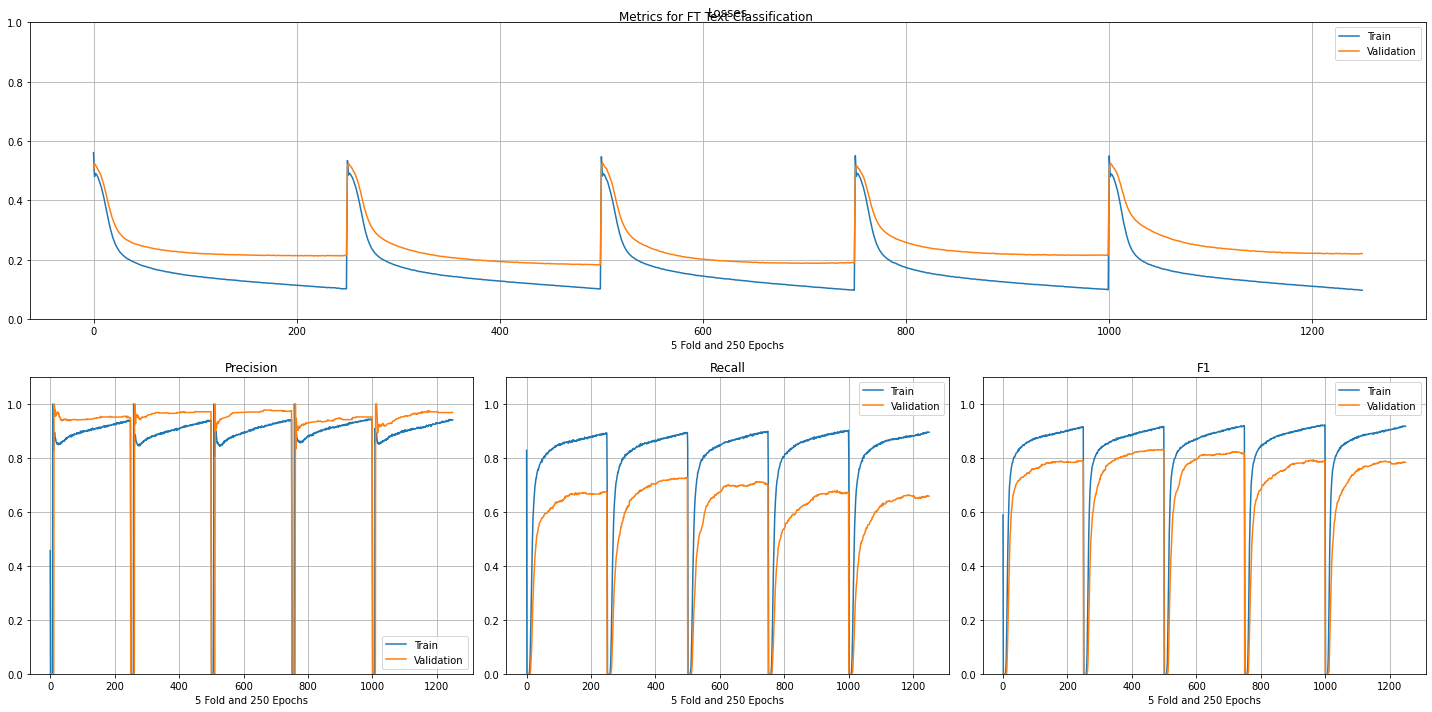

In [7]:
plot_results(ft_txt_only_results[0],'FT Text Classification')

In [8]:
ft_txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
247,0.916628,0.832311,0.939878,0.971360,0.894502,0.728086,0.102197,0.182903
248,0.915293,0.832311,0.938057,0.971360,0.893608,0.728086,0.101816,0.183237
243,0.915541,0.831116,0.938086,0.971292,0.894055,0.726297,0.103385,0.183900
245,0.914626,0.831116,0.937148,0.971292,0.893160,0.726297,0.103249,0.183117
244,0.912297,0.831116,0.935211,0.971292,0.890478,0.726297,0.103096,0.183655
...,...,...,...,...,...,...,...,...
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.475170,0.497573
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.480602,0.505417
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488457,0.507658
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491530,0.514377


# Multi Modality - Audio Fusion

In [9]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

In [48]:
ft_mfcc_fusion_results = run_k_fold(gpu, data, 'ft_vector', fusion=FusionTypes.MFCC, k_folds=5,
                              epochs=50, balance_classes=True,
                              dropout_level=0.1, lr=1e-3,
                              clip_at=None)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 50, Train Loss : 0.703 / Validation Loss : 0.691 [Time: 0.299547 seconds]
Epoch 2 / 50, Train Loss : 0.689 / Validation Loss : 0.679 [Time: 0.315098 seconds]
Epoch 3 / 50, Train Loss : 0.606 / Validation Loss : 0.434 [Time: 0.301738 seconds]
Epoch 4 / 50, Train Loss : 0.408 / Validation Loss : 0.362 [Time: 0.304559 seconds]
Epoch 5 / 50, Train Loss : 0.342 / Validation Loss : 0.416 [Time: 0.269463 seconds]
Epoch 6 / 50, Train Loss : 0.315 / Validation Loss : 0.357 [Time: 0.300888 seconds]
Epoch 7 / 50, Train Loss : 0.293 / Validation Loss : 0.339 [Time: 0.305119 seconds]
Epoch 8 / 50, Train Loss : 0.254 / Validation Loss : 0.350 [Time: 0.266898 seconds]
Epoch 9 / 50, Train Loss : 0.244 / Validation Loss : 0.371 [Time: 0.267095 seconds]
Epoch 10 / 50, Train Loss : 0.222 / Validation Loss : 0.400 [Time: 0.271188 seconds]
Epoch 11 / 50, Train Loss : 0.203 / Validation Loss : 0.355 [Time: 0.270846 second

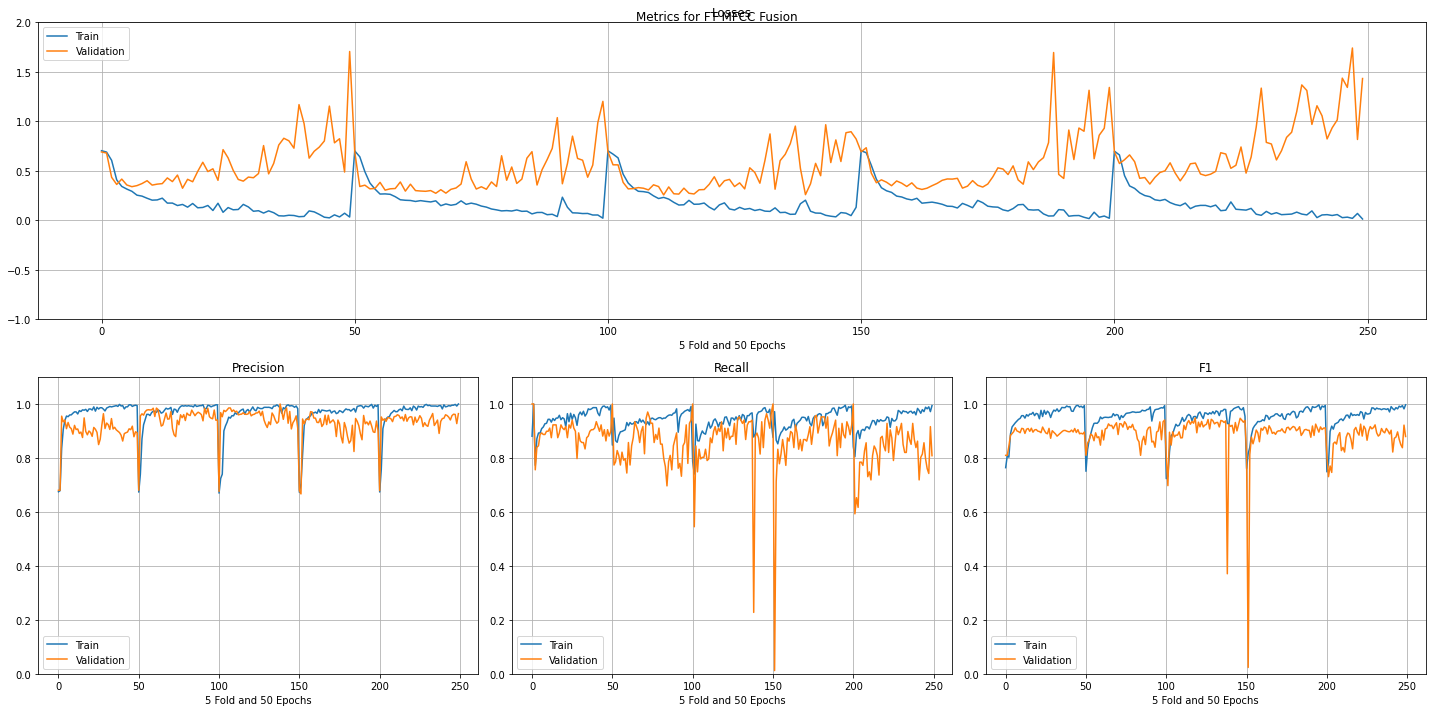

In [49]:
plot_results(ft_mfcc_fusion_results[0], 'FT MFCC Fusion')

In [50]:
ft_mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
18,0.954058,0.948328,0.979560,0.962963,0.929851,0.934132,0.163057,0.308206
46,0.981132,0.947059,0.992366,0.930636,0.970149,0.964072,0.077759,0.593885
28,0.963303,0.943284,0.987461,0.940476,0.940299,0.946108,0.119259,0.530461
26,0.961098,0.942249,0.982839,0.956790,0.940299,0.928144,0.130654,0.378330
49,0.994003,0.940476,0.996992,0.940476,0.991031,0.940476,0.020927,1.201780
...,...,...,...,...,...,...,...,...
3,0.917933,0.746377,0.934985,0.944954,0.901493,0.616766,0.347116,0.660637
1,0.780594,0.730627,0.758087,0.951923,0.804478,0.592814,0.660157,0.573621
1,0.732103,0.697318,0.724088,0.968085,0.740299,0.544910,0.668690,0.560448
38,0.928177,0.370732,0.984925,1.000000,0.877612,0.227545,0.166736,0.525433


In [ ]:
ft_mel_fusion_results = run_k_fold(gpu, data, 'ft_vector', fusion=FusionTypes.MEL, k_folds=5,
                              epochs=15, balance_classes=True,
                              dropout_level=0.2, lr=7e-4,
                              clip_at=1.0, img_path=IMG_PATH)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:440: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /pytorch/aten/src/ATen/native/Convolution.cpp:660.)
  self.padding, self.dilation, self.groups)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.700 / Validation : 0.691
Time for epoch : 307.527563 seconds
Epoch 2 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.691
Time for epoch : 23.466945 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.622 / Validation : 0.544
Time for epoch : 23.318964 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.476 / Validation : 0.428
Time for epoch : 23.343142 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.362 / Validation : 0.383
Time for epoch : 23.41175 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.319 / Validation : 0.381
Time for epoch : 23.434175 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.297 / Validation : 0.356
Time for epoch : 23.306684 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.254 / Validation : 0.463
Time for epoch : 23.41524 seconds
Epoch 9 / 15
Training 

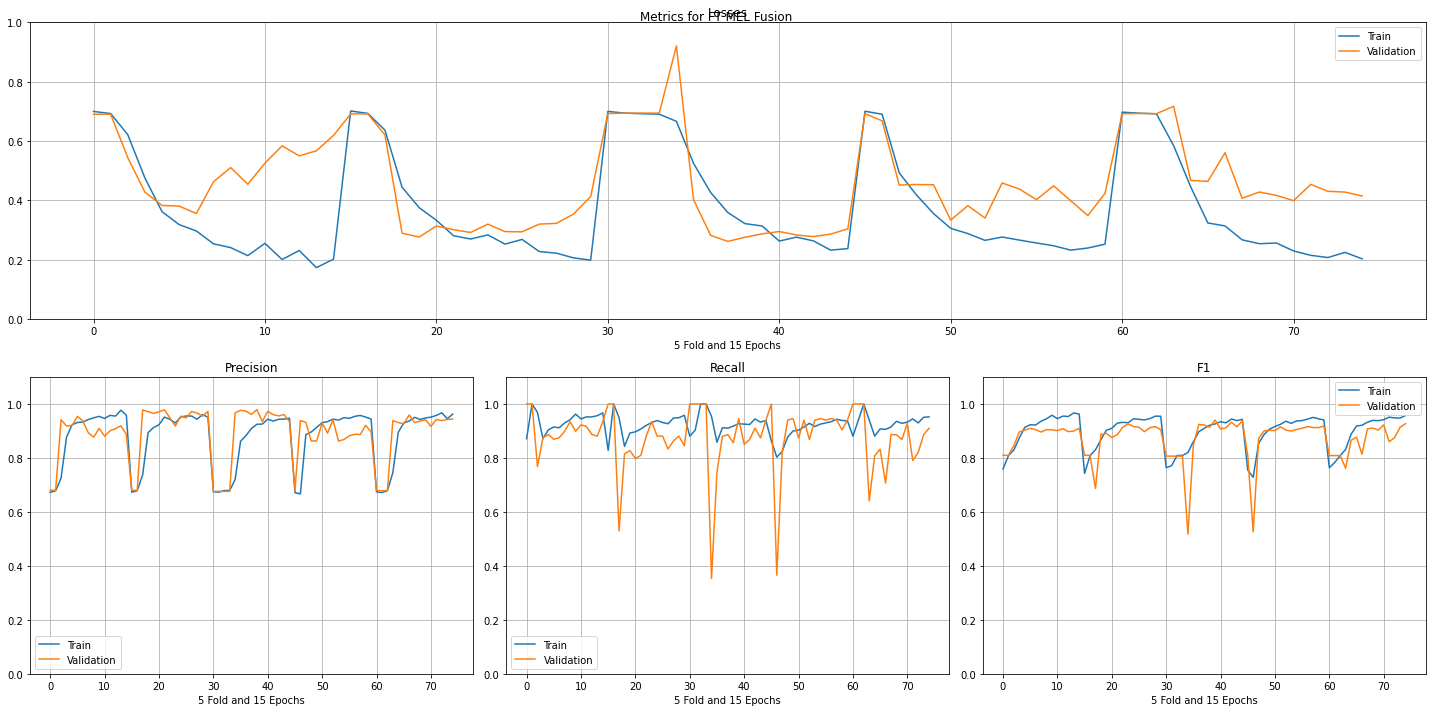

In [ ]:
plot_results(ft_mel_fusion_results[0], 'FT MEL Fusion')

In [ ]:
ft_mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
9,0.926174,0.940476,0.925484,0.934911,0.926866,0.946108,0.314053,0.287490
14,0.943028,0.937313,0.947289,0.934524,0.938806,0.940120,0.237983,0.304664
12,0.944072,0.932515,0.943368,0.955975,0.944776,0.910180,0.263808,0.278265
14,0.957239,0.926829,0.962293,0.944099,0.952239,0.910180,0.203276,0.414978
8,0.930545,0.926254,0.929851,0.918129,0.931241,0.934524,0.284116,0.320293
...,...,...,...,...,...,...,...,...
0,0.764249,0.806763,0.675057,0.676113,0.880597,1.000000,0.700178,0.693073
3,0.831683,0.761566,0.745562,0.938596,0.940299,0.640719,0.585098,0.717209
2,0.830065,0.687259,0.737515,0.978022,0.949178,0.529762,0.636990,0.620677
1,0.728504,0.525862,0.666667,0.938462,0.802985,0.365269,0.690590,0.668413
